In [112]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [113]:
# parameters
v1 = 10.0
v2 = 5.0
gamma = np.pi/6
deltaX = 3.0

In [114]:
t = np.linspace(0, 10, 100)
d = np.sqrt((deltaX + t * (v2*np.cos(gamma)- v1))**2 + (v2 * np.sin(gamma)*t)**2)
theta = np.atan2(v2 * np.sin(gamma) * t, deltaX + t * (v2*np.cos(gamma)- v1))

Text(0, 0.5, '$\\theta$')

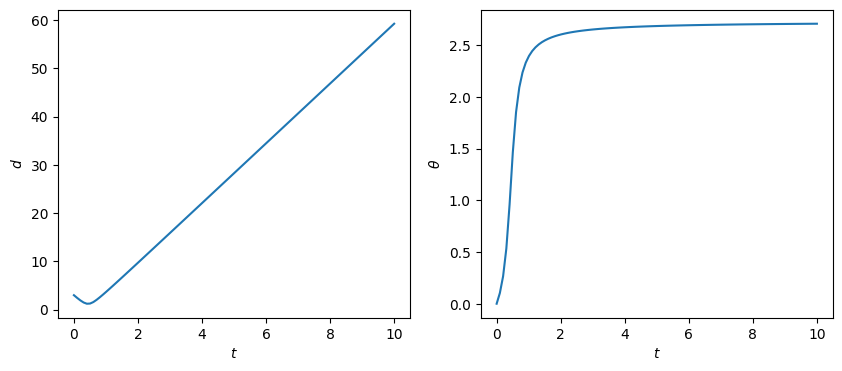

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(t, d)
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$d$')
ax[1].plot(t, theta)
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$\theta$')

### PYTORCH Version
To differentiate the code

In [116]:
# scalar parameters, enable gradients
deltaX = torch.tensor(deltaX, requires_grad=True)
v1     = torch.tensor(v1, requires_grad=True)
v2     = torch.tensor(v2, requires_grad=True)
gamma  = torch.tensor(gamma, requires_grad=True)

dd_ddeltaX = np.zeros_like(t)
dd_dv1     = np.zeros_like(t)
dd_dv2     = np.zeros_like(t)
dd_dgamma  = np.zeros_like(t)
dd_dt      = np.zeros_like(t)

for it in range(len(t)):
    time = torch.tensor(t[it], requires_grad=True)

    # compute d and theta
    d_t = torch.sqrt((deltaX + time * (v2*torch.cos(gamma) - v1))**2 +
                (v2 * torch.sin(gamma) * time)**2)

    theta_t = torch.atan2(v2 * torch.sin(gamma) * time,
                        deltaX + time * (v2*torch.cos(gamma) - v1))
    

    # compute gradients: must retain graph for repeated use
    g_deltaX = torch.autograd.grad(d_t, deltaX, retain_graph=True)[0]
    g_v1     = torch.autograd.grad(d_t, v1,     retain_graph=True)[0]
    g_v2     = torch.autograd.grad(d_t, v2,     retain_graph=True)[0]
    g_gamma  = torch.autograd.grad(d_t, gamma,  retain_graph=True)[0]

    # last grad call can free the graph
    g_time   = torch.autograd.grad(d_t, time)[0]

    dd_ddeltaX[it] = g_deltaX.item()
    dd_dv1[it]     = g_v1.item()
    dd_dv2[it]     = g_v2.item()
    dd_dgamma[it]  = g_gamma.item()
    dd_dt[it]      = g_time.item()
    
    
